# Tree Data

### import packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model, preprocessing
import statsmodels.formula.api as sm
import numpy as np
import statsmodels.stats.diagnostic as sms
from statsmodels.compat import lzip
import plotly.offline as py
from sklearn.preprocessing import scale
import plotly.graph_objs as go
import sklearn.model_selection as m_sel
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
py.offline.init_notebook_mode()

/home/user/Documents/Py3Env/Py3Env/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


### loading data

In [2]:
df = pd.read_csv('TreeData.csv').fillna(0)
df.head()

N0        Nt        pH  PetalCount         Age
0  15.178592  2.740211  5.888493           5  273.938372
1  14.927818  3.817926  5.988578           4  218.119552
2  15.098574  2.479578  5.910538           5  289.062489
3  15.117085  2.616488  5.934591           4  280.481960
4  15.285771  3.416325  6.117872           4  239.735358

### generating correlation between feature

In [3]:
corr = df.corr()
corr

N0        Nt        pH  PetalCount       Age
N0          1.000000  0.080825  0.053488    0.127779 -0.058794
Nt          0.080825  1.000000  0.003821   -0.003614 -0.980478
pH          0.053488  0.003821  1.000000    0.099505  0.007455
PetalCount  0.127779 -0.003614  0.099505    1.000000  0.053744
Age        -0.058794 -0.980478  0.007455    0.053744  1.000000

### Checking correlation

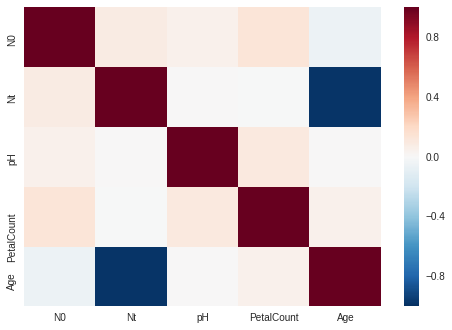

In [4]:
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)
plt.show()

### Generating scatter matrix

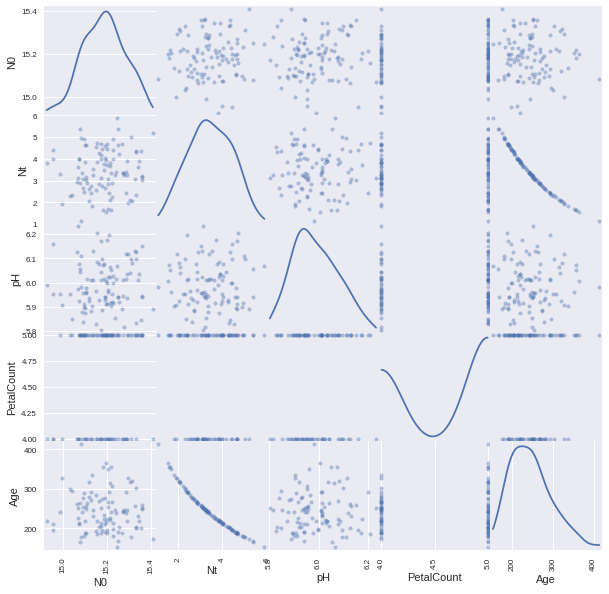

In [5]:
pd.scatter_matrix(df, alpha=0.4, figsize=(10, 10), diagonal='kde')
plt.show()

## Ridge Regression

### Importing Date - dividing training and test

In [6]:
df = pd.read_csv('TreeData.csv').fillna(0)
X = pd.get_dummies(df).drop('Age', axis=1)
col = X.columns
X = scale(X)
y = df.Age
y = scale(y) 
X_train, X_test, y_train, y_test = m_sel.train_test_split(X, y, test_size=0.2, random_state=42)

### Genertaing random alpha value

In [7]:
#alphas = 10**np.linspace(-10,-5,100)*0.5
alphas = np.logspace(-10,10,1000)

### Using Ridge Regression with different alphas
Calculating beta's coefficient and mse for different alpha

In [8]:
ridge = Ridge(normalize=True)
coefs = []
mse = []
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    mse.append(mean_squared_error(ridge.predict(X_test),y_test))
    coefs.append(ridge.coef_)

In [9]:
coefs = np.array(coefs).reshape(len(alphas), len(X_train[0]))

### Plotting MSE vs log(alpha)

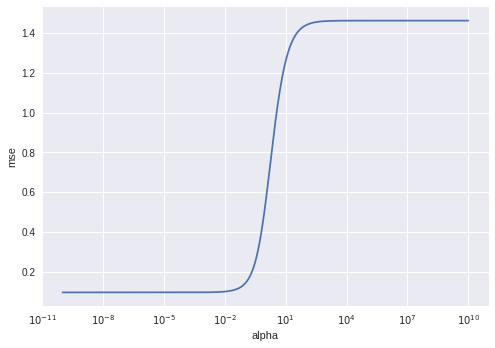

In [10]:
ax = plt.gca()
ax.plot(alphas, mse)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('mse')
plt.show()

In [11]:
trace = go.Scatter(
    x = np.log(alphas),
    y = mse,
    name = 'mse',
    line = dict(
        width = 3,
    )
)

data = [trace]


# Edit the layout
layout = dict(title = 'mse VS alphas',
              xaxis = dict(title = 'aplhas'),
              yaxis = dict(title = 'mse'),
              )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='mse-alpha-ridge-1')

### Plotting beta's value vs alpha

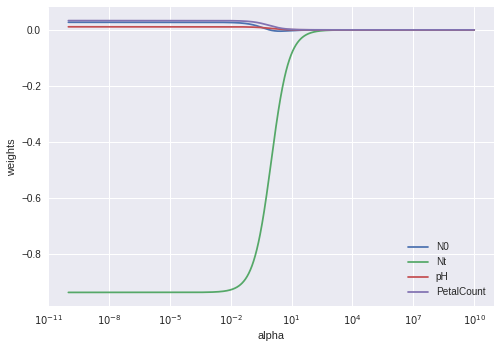

In [12]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.legend(col)
plt.show()

In [13]:
data = []

for beta in range(len(col)):
    
    trace = go.Scatter(
        x = np.log(alphas),
        y = coefs[:,beta],
        name = col[beta],
        line = dict(
            width = 3,
        )
    )
    
    data.append(trace)


# Edit the layout
layout = dict(title = 'weight VS alphas',
              xaxis = dict(title = 'aplhas'),
              yaxis = dict(title = 'weights'),
              )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='weight-alpha-ridge-2')


### Using Rigged Cross Validation to get best alpha value

In [14]:
ridgecv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error', normalize=True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

0.0032174181506763717

### Using the alph value obatined with rigged regression

In [15]:
ridge = Ridge(alpha=ridgecv.alpha_, normalize=True)
ridge.fit(X_train, y_train)
mean_squared_error(y_test, ridge.predict(X_test))

0.097378177407417027

## Lasso Regression

### Using Lasso Regression with different alphas
Calculating beta's coefficient and mse for different alpha

In [16]:
lasso = Lasso(max_iter=10000, normalize=False)
coefs = []
mse = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), scale(y_train))
    coefs.append(lasso.coef_)
    mse.append(mean_squared_error(lasso.predict(X_test),y_test))

In [17]:
coefs = np.array(coefs).reshape(len(alphas), len(col))

### Plotting MSE vs log(2*alpha)

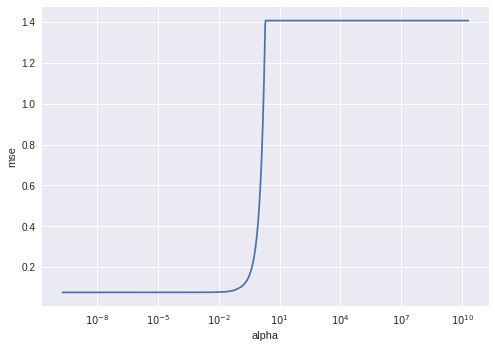

In [18]:
ax = plt.gca()
ax.plot(alphas*2, mse)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('mse')
plt.show()

In [19]:
trace = go.Scatter(
    x = np.log(2*alphas),
    y = mse,
    name = 'mse',
    line = dict(
        width = 3,
    )
)

data = [trace]


# Edit the layout
layout = dict(title = 'mse VS alphas : Lasso',
              xaxis = dict(title = 'aplhas'),
              yaxis = dict(title = 'mse'),
              )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='mse-alpha-lasso-1')


### Plotting beta's value vs alpha

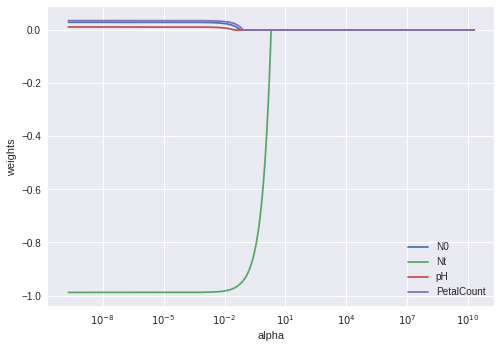

In [20]:
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.legend(col)
plt.show()

In [21]:
data = []

for beta in range(len(col)):
    
    trace = go.Scatter(
        x = np.log(alphas),
        y = coefs[:,beta],
        name = col[beta],
        line = dict(
            width = 3,
        )
    )
    
    data.append(trace)


# Edit the layout
layout = dict(title = 'weight VS alphas',
              xaxis = dict(title = 'aplhas'),
              yaxis = dict(title = 'weights'),
              )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='weight-alpha-lasso-2')


### Using Lasso Cross Validation to get best alpha value

In [22]:
lassocv = LassoCV(alphas=None, cv=10, max_iter=100000, normalize=True)
lassocv.fit(X_train, y_train)
lassocv.alpha_

0.00010404479627398267

### Using the alph value obatined with lasso regression

In [23]:
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
mean_squared_error(y_test, lasso.predict(X_test))

0.09609989770782626

## Model1

### Dividing data into training and testing

In [52]:
X_osl = df
col = X_osl.columns
#X_osl['Nt'] = np.log(X_osl['Nt']) 
X_osl = scale(X_osl)
X_osl = pd.DataFrame(X_osl, columns=col)

X = df.loc[:,['Nt']]
Y = df.loc[:,['Age']]
X = scale(X)
Y = scale(Y)
X_train, X_test , Y_train, Y_test = m_sel.train_test_split(X, Y, test_size=0.2, random_state=42)

In [53]:
results = sm.ols(formula="Age ~ Nt", data=X_osl[:80]).fit()
print (results.summary()) 

                            OLS Regression Results                            
Dep. Variable:                    Age   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.732e+05
Date:                Mon, 03 Apr 2017   Prob (F-statistic):          2.70e-132
Time:                        10:12:12   Log-Likelihood:                 194.76
No. Observations:                  80   AIC:                            -385.5
Df Residuals:                      78   BIC:                            -380.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0003      0.002      0.141      0.8

### Genertaing Linear Regression Model

In [54]:
regr = linear_model.LinearRegression()

### Fitting Data on the model 

In [55]:
regr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Coefficient value and Intercept value after fitting

In [56]:
print('Coefficients: \t', regr.coef_)
print('Intercept: \t', regr.intercept_)

Coefficients: 	 [[-0.99997943]]
Intercept: 	 [-0.00121833]


### Calculating Mean Square, RMS, and  Variance :

In [57]:
mean = np.mean((regr.predict(X_test) - Y_test) ** 2)
rms = np.sqrt(np.mean((regr.predict(X_test) - Y_test) ** 2))
variance_score = regr.score(X_test, Y_test)

In [58]:
print("Mean squared error : %.2f"% mean)
print("Root mean squared error : %.2f"% rms)
print('Variance score: %.2f' % variance_score)

Mean squared error : 0.00
Root mean squared error : 0.02
Variance score: 1.00


### Plotting graphs for test data


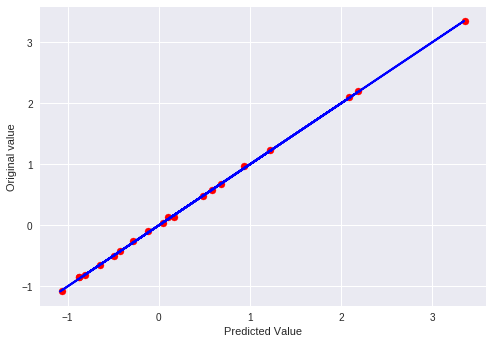

In [59]:
plt.scatter(regr.predict(X_test), Y_test,  color='r')
plt.xlabel('Predicted Value')
plt.ylabel('Original value')
plt.plot(Y_test, Y_test, color='blue',linewidth=2)
plt.show()

In [60]:
trace = go.Scatter(
    x=regr.predict(X_test),
    y=Y_test,
    mode='markers',
    name='Predicted vs Original',
    line=dict(shape='linear')
)
trace1 = go.Scatter(
    x=Y_test,
    y=Y_test,
    mode='lines',
    name='x = y',
    line=dict(shape='linear')
)
data = [trace, trace1]
layout = dict(
    legend=dict(
        traceorder='reversed',
        font=dict(size=16)
    )
)
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='Scatter plot for Normal Regression')


### Residual description for Model

### Histogram for residuals

In [61]:
residuals = regr.predict(X_test)- (Y_test)
df_res = pd.DataFrame(residuals)

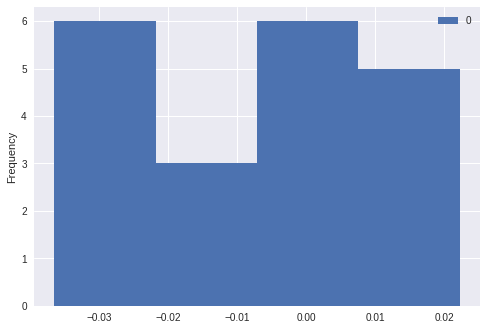

In [63]:
df_res.plot(kind='hist',bins=4)
plt.show()

In [64]:
trace = [go.Histogram(x = (regr.predict(X_test) - Y_test))]

layout = go.Layout(title = 'Histogram Plot for residuals', 
                   xaxis = dict(title = 'Residuals'),
                   yaxis = dict(title = 'Frequency'),
)
Fig = go.Figure(data = trace, layout = layout)
py.iplot(Fig, filename = 'SystolicBP')

### Box Plot for residuals

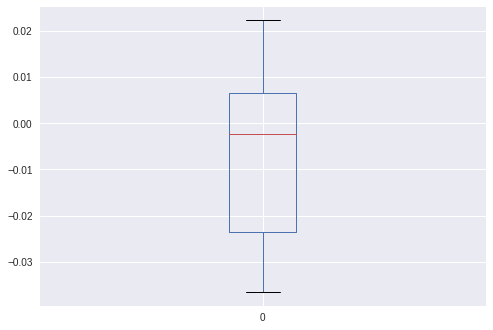

In [65]:
df_res.plot(kind='box')
plt.show()

### Regression Diagnostic

In [66]:
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(results.resid, results.model.exog)
lzip(name, test)

[('F statistic', 0.95042963795289326), ('p-value', 0.56185231271458436)]